## Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:
 - кошки (животные)
 - UNIX-утилита cat для вывода содержимого файлов
 - версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

In [1]:
import re
n = 0
all_words_by = {}      # all word by sentences
all_words = list()     # all words in one list
sentences = {}
with open('sentences.txt', 'r') as cat_txt:
    for line in cat_txt:
        sentences[n] = line
        sentence_words = re.split('[^a-z]', line.lower())   # lower case and split by words
        sentence_words = list(filter(None, sentence_words)) # deleting empty words
        all_words += sentence_words                         # adding words in current sentence to the list of all eords
        all_words_by[n] = sentence_words                    # adding words in list of words by sentences
        n = n + 1                                           # incrementing n (number of sentence)

In [2]:
all_words = list(set(all_words))                            # leave only unique words

In [3]:
dict_words = {i: all_words[i] for i in range(0, len(all_words))} # create a dict of all unique words

In [4]:
def count_words(word, sentence):                            # function for counting word in a sentence
    count = 0
    for el in sentence:
        if el == word:
            count += 1
    return count

In [5]:
import numpy as np

matrix = np.zeros((n, len(dict_words)))                     # creating a zero matrix with size (sentences, all words)
for i in range(n):                                          # for every sentence
    for j in range(len(dict_words)):                        # for every word in all words
        if dict_words[j] in all_words_by[i]:                # if the word is in the sentence, count it and fill the matrix
            matrix[i][j] = count_words(dict_words[j], all_words_by[i])

In [6]:
import scipy.spatial
# counting cosine distance for the first sentence and all others
for i in range(n):
    print(scipy.spatial.distance.cosine(matrix[0], matrix[i]))

0.0
0.9527544408738466
0.8644738145642124
0.8951715163278082
0.7770887149698589
0.9402385695332803
0.7327387580875756
0.9258750683338899
0.8842724875284311
0.9055088817476932
0.8328165362273942
0.8804771390665607
0.8396432548525454
0.8703592552895671
0.8740118423302576
0.9442721787424647
0.8406361854220809
0.956644501523794
0.9442721787424647
0.8885443574849294
0.8427572744917122
0.8250364469440588


In [7]:
# conclusion is that 4-th and 6-th sentences have the smallest cosine distance with the first sentence
# lets read them and find out if they are similiar

print('1-st sentence:\n' + sentences[0] + '\n')
print('4-th sentence:\n' + sentences[4] + '\n')
print('6-th sentence:\n' + sentences[6] + '\n')

1-st sentence:
In comparison to dogs, cats have not undergone major changes during the domestication process.


4-th sentence:
In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.


6-th sentence:
Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).




In [8]:
# We can see that these sentences really have similar themathics

## Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

In [129]:
import numpy as np
import scipy.linalg
%matplotlib inline
from matplotlib import pylab as plt

In [130]:
def f(x):
    return (np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2))

In [131]:
def polynomial(x, a, n):
    ans = 0
    for i in range(0, n + 1):
        ans += a[i] * (x**i)
    return ans

In [132]:
def create_coef_matrix(x_values, n):
    i = 0
    j = 0
    x_coef = np.zeros((n + 1, n + 1))
    row = np.zeros(n + 1)
    for x in x_values:
        i = 0
        for i in range(0, n + 1):
            row[i] = x ** i
        x_coef[j] = row
        j += 1
    return x_coef

In [133]:
def plot_graphics(a, n):
    x = np.arange(1, 15, 0.1)
    plt.plot(x, polynomial(x, a, n))
    plt.plot(x, f(x))
    plt.show()

In [134]:
def create_func_value_vector(x_values, n):
    i = 0
    b = np.zeros((n + 1, 1))
    for x in x_values:
        b[i] = f(x)
        i += 1
    return b

In [143]:
def print_results(x_values, b, a, n):
    i = 0
    for coef in a:
        print('coefficient %d = %f'%(i, a[i][0]))
        i += 1
    i = 0
    for x in x_values:
        print('if x = %f: f(x) = %f, polynomial(x) = %f'%(x, b[i][0], polynomial(x, a, n)[0]))
        i += 1

In [144]:
def do_approx(x_values, n):
    x_coef = create_coef_matrix(x_values, n)
    b = create_func_value_vector(x_values, n)
    a = scipy.linalg.solve(x_coef, b)
    print_results(x_values, b, a, n)
    plot_graphics(a, n)

coefficient 0 = 3.439145
coefficient 1 = -0.186928
if x = 1.000000: f(x) = 3.252217, polynomial(x) = 3.252217
if x = 15.000000: f(x) = 0.635221, polynomial(x) = 0.635221


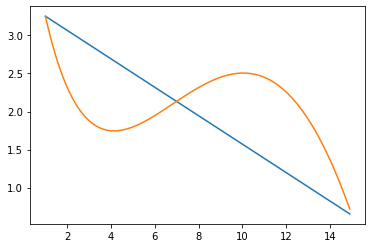

In [145]:
# Ax = b 
# we are trying to find out A matrix
# a0 * x^0 + a1 * x^1 = f(x)
# so:
#    a0 * 1 + a1 * 1 = f(1)
#    a0 * 1 + a1 * 15 = f(15)
# this is SLAU for coefficients

do_approx([1., 15.], 1)

coefficient 0 = 3.325129
coefficient 1 = -0.065312
coefficient 2 = -0.007601
if x = 1.000000: f(x) = 3.252217, polynomial(x) = 3.252217
if x = 8.000000: f(x) = 2.316170, polynomial(x) = 2.316170
if x = 15.000000: f(x) = 0.635221, polynomial(x) = 0.635221


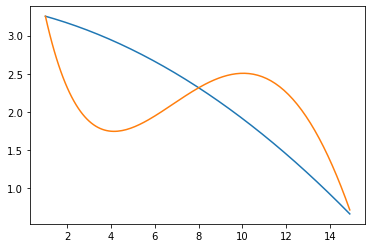

In [146]:
# a0 * x^0 + a1 * x^1 + a2 * x^2 = f(x)
#
# a0 * 1 + a1 * 1 + a2 * 1 = f(1)
# a0 * 1 + a1 * 8 + a2 * 64 = f(8)
# a0 * 1 + a1 * 15 + a2 * 225 = f(15)

do_approx([1., 8., 15.], 2)

coefficient 0 = 4.362642
coefficient 1 = -1.295526
coefficient 2 = 0.193337
coefficient 3 = -0.008236
if x = 1.000000: f(x) = 3.252217, polynomial(x) = 3.252217
if x = 4.000000: f(x) = 1.746846, polynomial(x) = 1.746846
if x = 10.000000: f(x) = 2.505416, polynomial(x) = 2.505416
if x = 15.000000: f(x) = 0.635221, polynomial(x) = 0.635221


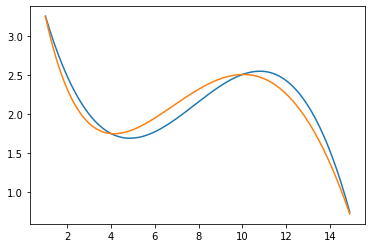

In [147]:
do_approx([1., 4., 10., 15.], 3)